In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from itertools import combinations
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [7]:
df = pd.read_csv('/Users/mrgholt/GADS-22-NYC/Datasets/Hitters.csv')

In [8]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [9]:
df.dropna(inplace = True)

In [10]:
df.League = pd.factorize(df.League)[0]
df.Division = pd.factorize(df.Division)[0]
df.NewLeague = pd.factorize(df.NewLeague)[0]

In [11]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


In [12]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,0.528517,0.490494,290.711027,118.760456,8.593156,535.925882,0.536122
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,0.500138,0.500863,279.934575,145.080577,6.606574,451.118681,0.499644
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,0.000000,0.000000,113.500000,8.000000,3.000000,190.000000,0.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,1.000000,0.000000,224.000000,45.000000,7.000000,425.000000,1.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,1.000000,1.000000,322.500000,192.000000,13.000000,750.000000,1.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1.000000,1.000000,1377.000000,492.000000,32.000000,2460.000000,1.000000


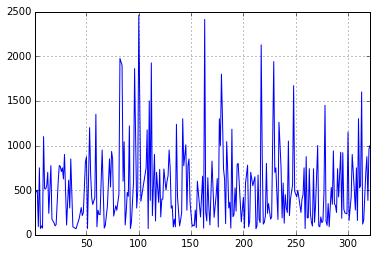

In [13]:
df.Salary.plot()

In [33]:
predictors = list(df.columns.values)
predictors.remove('Salary')
print predictors

['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague']


In [15]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(df)

In [36]:
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [37]:
df_scaled.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,263.000000,2.630000e+02,2.630000e+02,2.630000e+02
mean,1.013131e-17,5.741077e-17,3.377104e-17,-5.065656e-17,1.215758e-16,1.688552e-18,-5.403367e-17,6.078788e-17,6.754209e-17,5.403367e-17,3.377104e-17,4.052525e-17,1.080673e-16,1.013131e-16,1.080673e-16,7.429629e-17,0.000000,1.046902e-16,1.519697e-16,-4.390236e-17
std,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907,1.001907e+00,1.001907e+00,1.001907e+00
min,-2.616138e+00,-2.371896e+00,-1.329426e+00,-2.147612e+00,-1.993023e+00,-1.896692e+00,-1.319217e+00,-1.156124e+00,-1.110083e+00,-8.439610e-01,-1.086676e+00,-1.014457e+00,-9.837330e-01,-1.058758e+00,-9.811659e-01,-1.040476e+00,-0.820143,-1.303178e+00,-1.040345e+00,-1.075052e+00
25%,-8.239485e-01,-8.066016e-01,-7.573725e-01,-8.334341e-01,-8.317388e-01,-8.356459e-01,-6.921917e-01,-7.952934e-01,-7.885827e-01,-6.611260e-01,-7.735785e-01,-7.294084e-01,-7.181322e-01,-1.058758e+00,-9.811659e-01,-6.342514e-01,-0.764897,-8.482187e-01,-7.682799e-01,-1.075052e+00
50%,6.364424e-02,-1.072148e-01,-2.997299e-01,-1.076939e-01,-1.736775e-01,-1.897920e-01,-2.741747e-01,-3.183479e-01,-3.186972e-01,-3.564009e-01,-3.364525e-01,-3.111310e-01,-3.273195e-01,9.445032e-01,-9.811659e-01,-2.387637e-01,-0.509380,-2.416068e-01,-2.463595e-01,9.301872e-01
75%,8.322111e-01,7.475913e-01,7.299662e-01,7.161194e-01,7.553501e-01,7.328565e-01,5.618594e-01,5.402415e-01,5.128764e-01,2.835218e-01,4.122581e-01,2.914983e-01,2.588995e-01,9.445032e-01,1.019196e+00,1.137751e-01,0.505782,6.683110e-01,4.754453e-01,9.301872e-01
max,1.927249e+00,2.890157e+00,3.247001e+00,2.952184e+00,2.690824e+00,2.947213e+00,3.487979e+00,4.993120e+00,5.462131e+00,5.835613e+00,5.456601e+00,4.116413e+00,4.954343e+00,9.445032e-01,1.019196e+00,3.887909e+00,2.577541,3.549717e+00,4.273249e+00,9.301872e-01


In [39]:
df_scaled[predictors].corrwith(df_scaled.Salary).sort(ascending = False, inplace = False)

CRBI         0.566966
CRuns        0.562678
CHits        0.548910
CAtBat       0.526135
CHmRun       0.524931
CWalks       0.489822
RBI          0.449457
Walks        0.443867
Hits         0.438675
Runs         0.419859
Years        0.400657
AtBat        0.394771
HmRun        0.343028
PutOuts      0.300480
Division     0.192514
Assists      0.025436
League       0.014282
NewLeague    0.002834
Errors      -0.005401
dtype: float64

---
#Now use the functions from the Regularization class - brute_force(), etc
#You will have to modify brute force by 1 line because there are too many features here to use all combinations
#I would suggest you try up to and including 5 features only
---